## version 2 of testing file

In [1]:
#import needed libraries
import pandas as pd
import rdkit
import main_v1
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

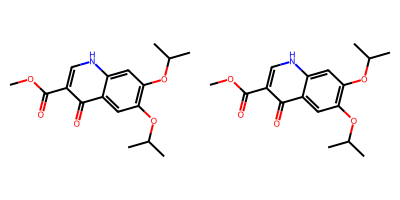

In [2]:
#test printing molecule
smiles = ['COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O', "COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [3]:
#import data
data_raw = pd.read_csv('../data/tested_molecules.csv')
data_raw

SMILES  PKM2_inhibition  \
0                                 C=C(C)c1nc(N)nc(N)n1                0   
1                       C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1                0   
2                              C=CCNC(=O)CCCC(=O)NCC=C                0   
3                  C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21                0   
4                         C=CCn1cc(Cl)c(=O)n(CC=C)c1=O                0   
...                                                ...              ...   
1111    O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1                0   
1112  O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1                0   
1113      Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12                0   
1114            c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1                0   
1115  c1ccc(C2=Nn3c(nnc3-c3cc(-c4ccccc4)n[nH]3)SC2)cc1                0   

      ERK2_inhibition  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1111                1  
1112                1  
1113                1  
1114                1  
1115                1  

[1116 rows x 3 columns]

In [4]:
# Create dataframe
expanded_df = main_v1.create_dataframe(data_raw)
expanded_df.head()

SMILES  PKM2_inhibition  ERK2_inhibition  \
0                 C=C(C)c1nc(N)nc(N)n1                0                0   
1       C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1                0                0   
2              C=CCNC(=O)CCCC(=O)NCC=C                0                0   
3  C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21                0                0   
4         C=CCn1cc(Cl)c(=O)n(CC=C)c1=O                0                0   

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           5.313889        5.313889           0.120833        0.120833   
1          11.238954       11.238954           0.225308       -0.366756   
2          11.090706       11.090706           0.049610       -0.049610   
3          11.892238       11.892238           0.076632       -0.457824   
4          11.693580       11.693580           0.012315       -0.498260   

        qed        SPS    MolWt  ...  Bit_1014  Bit_1015  Bit_1016  Bit_1017  \
0  0.592228   9.545455  151.173  ...         0         0         0         1   
1  0.785414  10.470588  250.681  ...         0         0         0         0   
2  0.581062   9.066667  210.277  ...         0         0         0         0   
3  0.441090  10.411765  232.239  ...         0         0         0         0   
4  0.720343   9.933333  226.663  ...         0         0         0         0   

   Bit_1018  Bit_1019  Bit_1020  Bit_1021  Bit_1022  Bit_1023  
0         0         0         0         0         1         0  
1         0         0         0         0         1         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0  

[5 rows x 1237 columns]

In [5]:
# verwijderen van PKM2_inhibition en ERK2_inhibition, want dit zijn de labels en dit is enkel nodig om het deep learning model te trainen
expanded_df = expanded_df.drop(columns = ['PKM2_inhibition','ERK2_inhibition'])
expanded_df

SMILES  MaxAbsEStateIndex  \
0                                 C=C(C)c1nc(N)nc(N)n1           5.313889   
1                       C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1          11.238954   
2                              C=CCNC(=O)CCCC(=O)NCC=C          11.090706   
3                  C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21          11.892238   
4                         C=CCn1cc(Cl)c(=O)n(CC=C)c1=O          11.693580   
...                                                ...                ...   
1111    O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1          12.955843   
1112  O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1          12.983770   
1113      Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12          10.579691   
1114            c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1           4.812249   
1115  c1ccc(C2=Nn3c(nnc3-c3cc(-c4ccccc4)n[nH]3)SC2)cc1           4.773662   

      MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0           5.313889           0.120833        0.120833  0.592228   9.545455   
1          11.238954           0.225308       -0.366756  0.785414  10.470588   
2          11.090706           0.049610       -0.049610  0.581062   9.066667   
3          11.892238           0.076632       -0.457824  0.441090  10.411765   
4          11.693580           0.012315       -0.498260  0.720343   9.933333   
...              ...                ...             ...       ...        ...   
1111       12.955843           0.016627       -0.290408  0.764433  17.703704   
1112       12.983770           0.009487       -3.772852  0.594812  11.720000   
1113       10.579691           0.249681        0.249681  0.753119  15.640000   
1114        4.812249           0.983396        0.983396  0.738254  14.956522   
1115        4.773662           0.662326        0.662326  0.606144  13.307692   

        MolWt  HeavyAtomMolWt  ExactMolWt  ...  Bit_1014  Bit_1015  Bit_1016  \
0     151.173         142.101  151.085795  ...         0         0         0   
1     250.681         239.593  250.039672  ...         0         0         0   
2     210.277         192.133  210.136828  ...         0         0         0   
3     232.239         220.143  232.084792  ...         0         0         0   
4     226.663         215.575  226.050905  ...         0         0         0   
...       ...             ...         ...  ...       ...       ...       ...   
1111  362.385         344.241  362.126657  ...         0         0         0   
1112  374.442         361.338  374.042773  ...         0         0         0   
1113  355.849         335.689  355.132015  ...         0         0         0   
1114  322.437         304.293  322.125218  ...         0         0         0   
1115  358.430         344.318  358.100065  ...         0         0         0   

      Bit_1017  Bit_1018  Bit_1019  Bit_1020  Bit_1021  Bit_1022  Bit_1023  
0            1         0         0         0         0         1         0  
1            0         0         0         0         0         1         0  
2            0         0         0         0         0         0         0  
3            0         0         0         0         0         0         0  
4            0         0         0         0         0         0         0  
...        ...       ...       ...       ...       ...       ...       ...  
1111         0         0         1         0         0         0         1  
1112         0         0         0         0         0         0         0  
1113         0         0         0         0         1         0         0  
1114         0         0         0         0         0         0         0  
1115         0         0         0         0         0         0         0  

[1116 rows x 1235 columns]

In [6]:
expanded_df.describe()



MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count        1116.000000     1116.000000        1116.000000     1116.000000   
mean           11.755641       11.755641           0.163540       -1.049675   
std             2.232314        2.232314           0.183773        1.534098   
min             3.295899        3.295899           0.000269       -6.846394   
25%            11.862167       11.862167           0.046637       -1.242713   
50%            12.412161       12.412161           0.105302       -0.404874   
75%            12.892687       12.892687           0.205572       -0.123116   
max            14.950036       14.950036           1.101853        1.101853   

               qed          SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1116.000000  1116.000000  1116.000000     1116.000000  1116.000000   
mean      0.684839    15.241012   347.818473      328.200409   347.458997   
std       0.148925     5.621078    71.906315       68.148378    71.829989   
min       0.243857     9.066667   151.173000      142.101000   151.085795   
25%       0.581350    11.113324   295.335500      278.281750   295.047004   
50%       0.700589    14.273504   348.316500      328.242000   347.625500   
75%       0.803140    17.368908   401.547500      378.322250   401.220656   
max       0.945352    72.187500   592.649000      556.361000   592.253314   

       NumValenceElectrons  ...     Bit_1014     Bit_1015     Bit_1016  \
count          1116.000000  ...  1116.000000  1116.000000  1116.000000   
mean            127.992832  ...     0.047491     0.006272     0.011649   
std              26.927705  ...     0.212782     0.078985     0.107347   
min              52.000000  ...     0.000000     0.000000     0.000000   
25%             108.000000  ...     0.000000     0.000000     0.000000   
50%             128.000000  ...     0.000000     0.000000     0.000000   
75%             146.000000  ...     0.000000     0.000000     0.000000   
max             228.000000  ...     1.000000     1.000000     1.000000   

          Bit_1017     Bit_1018     Bit_1019     Bit_1020     Bit_1021  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean      0.073477     0.014337     0.304659     0.007168     0.024194   
std       0.261034     0.118929     0.460469     0.084401     0.153719   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Bit_1022     Bit_1023  
count  1116.000000  1116.000000  
mean      0.008065     0.011649  
std       0.089480     0.107347  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 1234 columns]

In [7]:
# checken of er outliers zijn door boxplots te maken
expanded_df.describe()

# checken of we geen missing values hebben
nan_counts = expanded_df.columns[expanded_df.isnull().any()].tolist()
print(nan_counts)

# checken of er lijsten zijn die enkel dezelfde waarde bevat
non_variating_columns = expanded_df.columns[expanded_df.nunique()==1].tolist()
print(len(non_variating_columns))

# omdat de hele lijst geen variatie vertoont verwijderen we hem want dan kan er op basis van deze variabelen ook geen onderscheid worden gemaakt tussen de moleculen
expanded_df.drop(columns = non_variating_columns, inplace = True)
expanded_df.describe()


[]
23


MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count        1116.000000     1116.000000        1116.000000     1116.000000   
mean           11.755641       11.755641           0.163540       -1.049675   
std             2.232314        2.232314           0.183773        1.534098   
min             3.295899        3.295899           0.000269       -6.846394   
25%            11.862167       11.862167           0.046637       -1.242713   
50%            12.412161       12.412161           0.105302       -0.404874   
75%            12.892687       12.892687           0.205572       -0.123116   
max            14.950036       14.950036           1.101853        1.101853   

               qed          SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1116.000000  1116.000000  1116.000000     1116.000000  1116.000000   
mean      0.684839    15.241012   347.818473      328.200409   347.458997   
std       0.148925     5.621078    71.906315       68.148378    71.829989   
min       0.243857     9.066667   151.173000      142.101000   151.085795   
25%       0.581350    11.113324   295.335500      278.281750   295.047004   
50%       0.700589    14.273504   348.316500      328.242000   347.625500   
75%       0.803140    17.368908   401.547500      378.322250   401.220656   
max       0.945352    72.187500   592.649000      556.361000   592.253314   

       NumValenceElectrons  ...     Bit_1014     Bit_1015     Bit_1016  \
count          1116.000000  ...  1116.000000  1116.000000  1116.000000   
mean            127.992832  ...     0.047491     0.006272     0.011649   
std              26.927705  ...     0.212782     0.078985     0.107347   
min              52.000000  ...     0.000000     0.000000     0.000000   
25%             108.000000  ...     0.000000     0.000000     0.000000   
50%             128.000000  ...     0.000000     0.000000     0.000000   
75%             146.000000  ...     0.000000     0.000000     0.000000   
max             228.000000  ...     1.000000     1.000000     1.000000   

          Bit_1017     Bit_1018     Bit_1019     Bit_1020     Bit_1021  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean      0.073477     0.014337     0.304659     0.007168     0.024194   
std       0.261034     0.118929     0.460469     0.084401     0.153719   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Bit_1022     Bit_1023  
count  1116.000000  1116.000000  
mean      0.008065     0.011649  
std       0.089480     0.107347  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 1211 columns]

In [8]:
# Controleren op normaal verdeeldheid
normality_results = main_v1.check_normality(expanded_df.iloc[:,1:])

# Print resultaten
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"Kolom {column} is normaal verdeeld (p-waarde = {p_value:.5f})")
print('Done')

# geen enkele variabele is dus normaal verdeeld --> standard scaling is naar onze mening dus geen goed idee, wij zouden voor min-max gaan

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(expanded_df.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_array, columns=expanded_df.iloc[:,1:].columns)

# Weergeven van de geschaalde DataFrame
scaled_df.describe()

# scaled_df heeft niet meer de SMILES erin staan

Done


MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count        1116.000000     1116.000000        1116.000000     1116.000000   
mean            0.725900        0.725900           0.148215        0.729308   
std             0.191547        0.191547           0.166826        0.193011   
min             0.000000        0.000000           0.000000        0.000000   
25%             0.735041        0.735041           0.042092        0.705021   
50%             0.782234        0.782234           0.095347        0.810433   
75%             0.823466        0.823466           0.186371        0.845882   
max             1.000000        1.000000           1.000000        1.000000   

               qed          SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1116.000000  1116.000000  1116.000000     1116.000000  1116.000000   
mean      0.628632     0.097818     0.445427        0.449233     0.445122   
std       0.212297     0.089053     0.162877        0.164506     0.162818   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%       0.481105     0.032424     0.326547        0.328733     0.326319   
50%       0.651084     0.082490     0.446555        0.449334     0.445499   
75%       0.797273     0.131529     0.567130        0.570225     0.566984   
max       1.000000     1.000000     1.000000        1.000000     1.000000   

       NumValenceElectrons  ...     Bit_1014     Bit_1015     Bit_1016  \
count          1116.000000  ...  1116.000000  1116.000000  1116.000000   
mean              0.431777  ...     0.047491     0.006272     0.011649   
std               0.152998  ...     0.212782     0.078985     0.107347   
min               0.000000  ...     0.000000     0.000000     0.000000   
25%               0.318182  ...     0.000000     0.000000     0.000000   
50%               0.431818  ...     0.000000     0.000000     0.000000   
75%               0.534091  ...     0.000000     0.000000     0.000000   
max               1.000000  ...     1.000000     1.000000     1.000000   

          Bit_1017     Bit_1018     Bit_1019     Bit_1020     Bit_1021  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean      0.073477     0.014337     0.304659     0.007168     0.024194   
std       0.261034     0.118929     0.460469     0.084401     0.153719   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Bit_1022     Bit_1023  
count  1116.000000  1116.000000  
mean      0.008065     0.011649  
std       0.089480     0.107347  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 1211 columns]

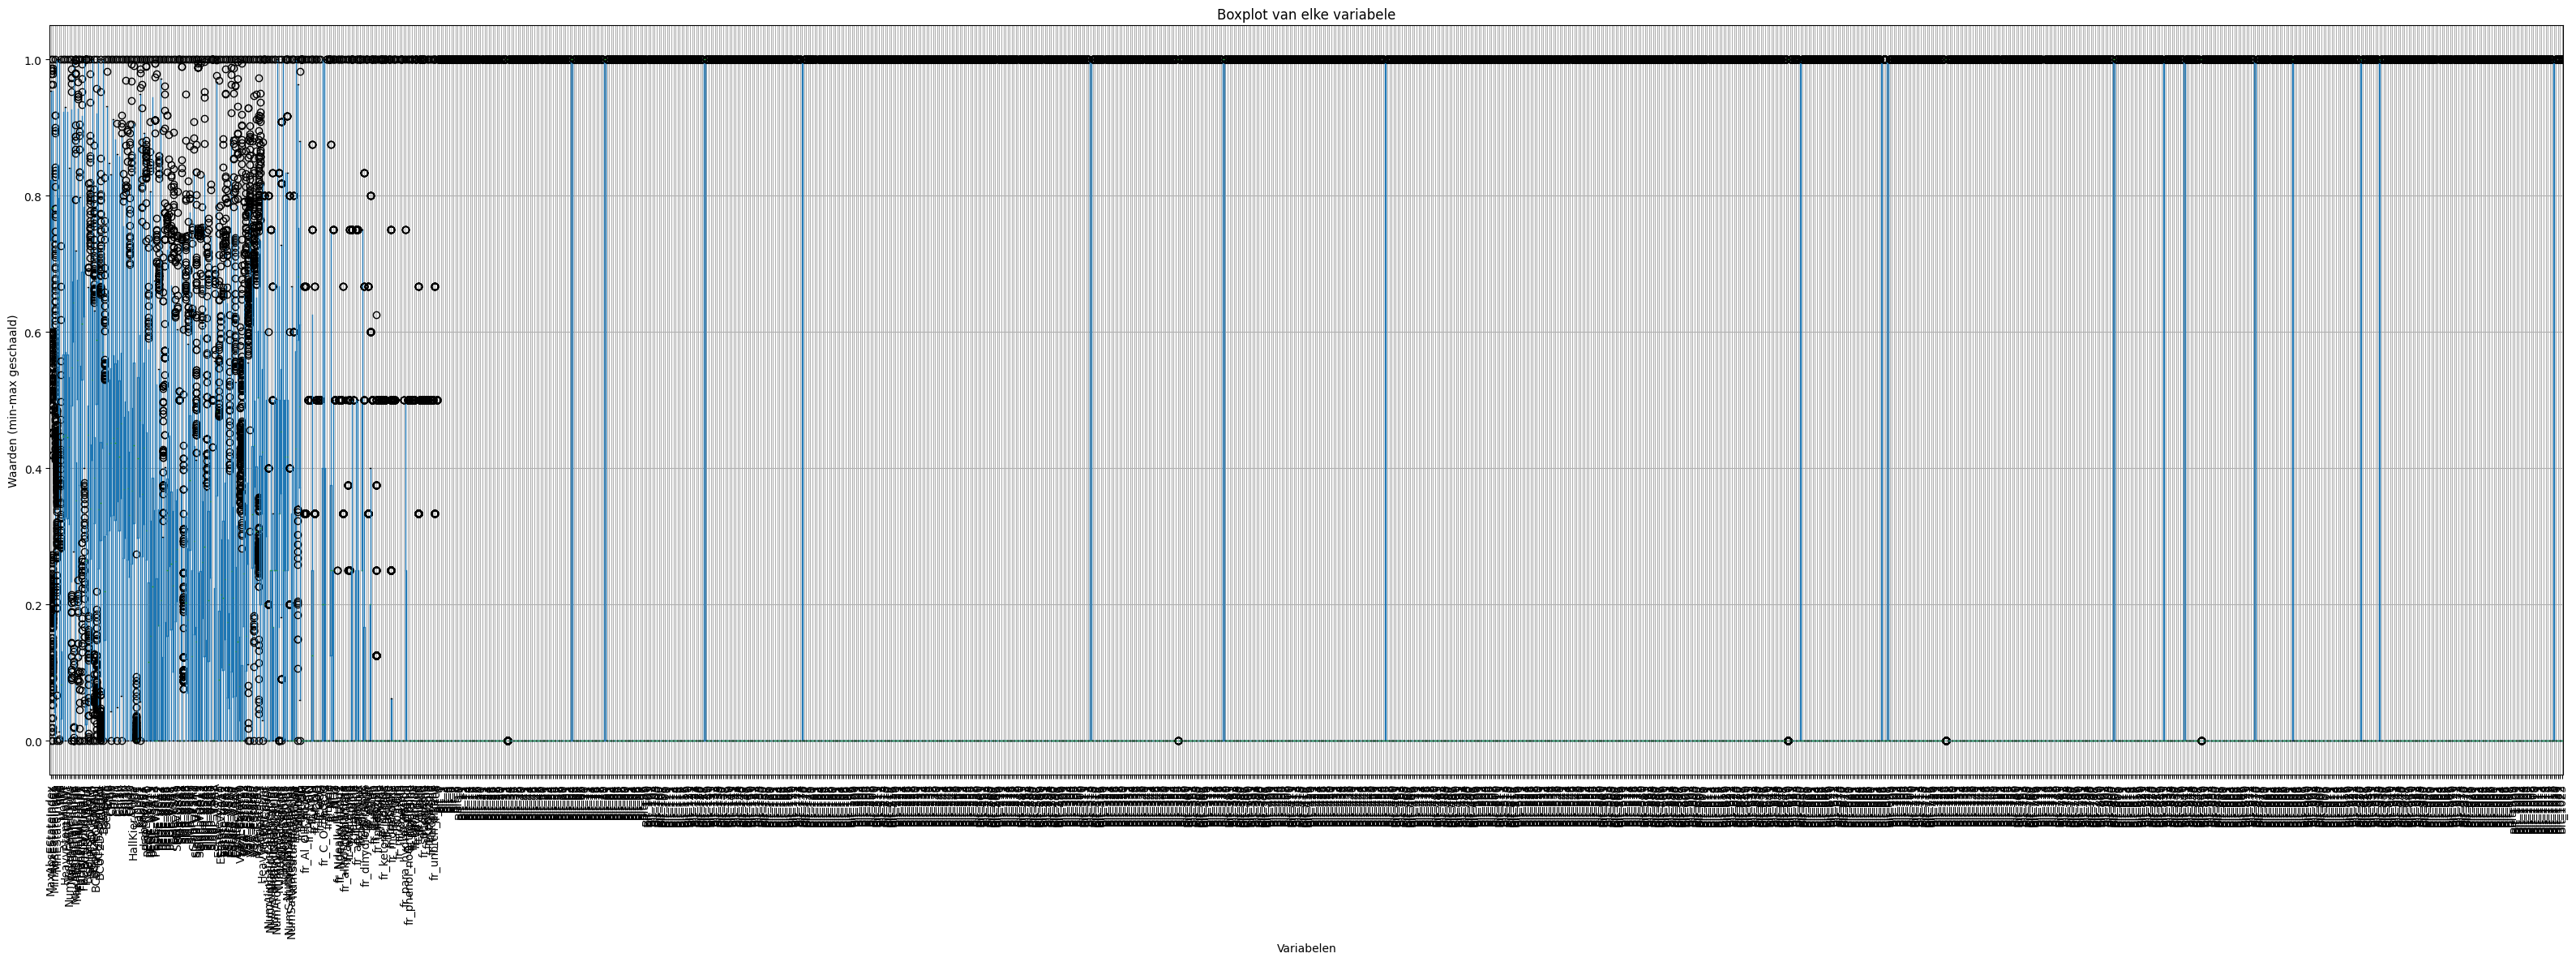

In [9]:
# plotten van min-max scaled values
plt.figure(figsize=(40, 12))
scaled_df.boxplot(rot=90)
plt.title('Boxplot van elke variabele')
plt.ylabel('Waarden (min-max geschaald)')
plt.xlabel('Variabelen')
plt.show()

In [10]:
# Hier moeten nog de outliers uitgehaald worden
# Function to calculate number of outliers in a column
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound)).sum()
    return outliers

# Apply the function to each column
outliers_per_column = expanded_df.iloc[:, 1:].apply(count_outliers)
print("Number of outliers per column:")
print(outliers_per_column)

Number of outliers per column:
MaxAbsEStateIndex    145
MaxEStateIndex       145
MinAbsEStateIndex     93
MinEStateIndex       239
qed                    2
                    ... 
Bit_1019               0
Bit_1020               8
Bit_1021              27
Bit_1022               9
Bit_1023              13
Length: 1211, dtype: int64


In [11]:
# use PCA
pca = PCA()
pca.fit(scaled_df)




PCA()

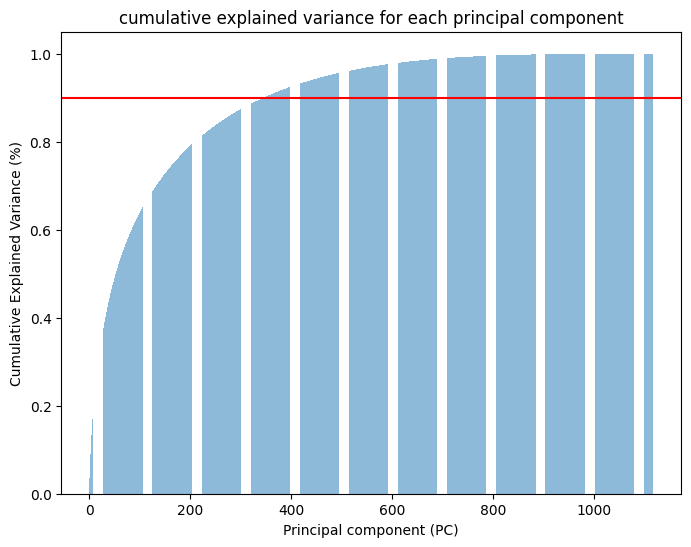

In [12]:
# MinMaxScaler

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center')

plt.axhline(y=0.9,color='r',linestyle='-')
plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('cumulative explained variance for each principal component')

plt.show()

In [13]:
# Kijken welke het belangrijkste is in pc1
important_idx = np.argmax(np.abs(pca.components_[0]))
important_feature = scaled_df.columns[important_idx]
important_feature

'Bit_893'

In [14]:
# Kijken welke het minst belangrijkste is
important_idx = np.argmin(np.abs(pca.components_[0]))
important_feature = scaled_df.columns[important_idx]
important_feature

'Bit_192'

In [15]:
# Nummer of Principal Components bij MinMaxScaling
num_components = np.argmax(cumulative_variance >= 0.80) + 1
num_components

210

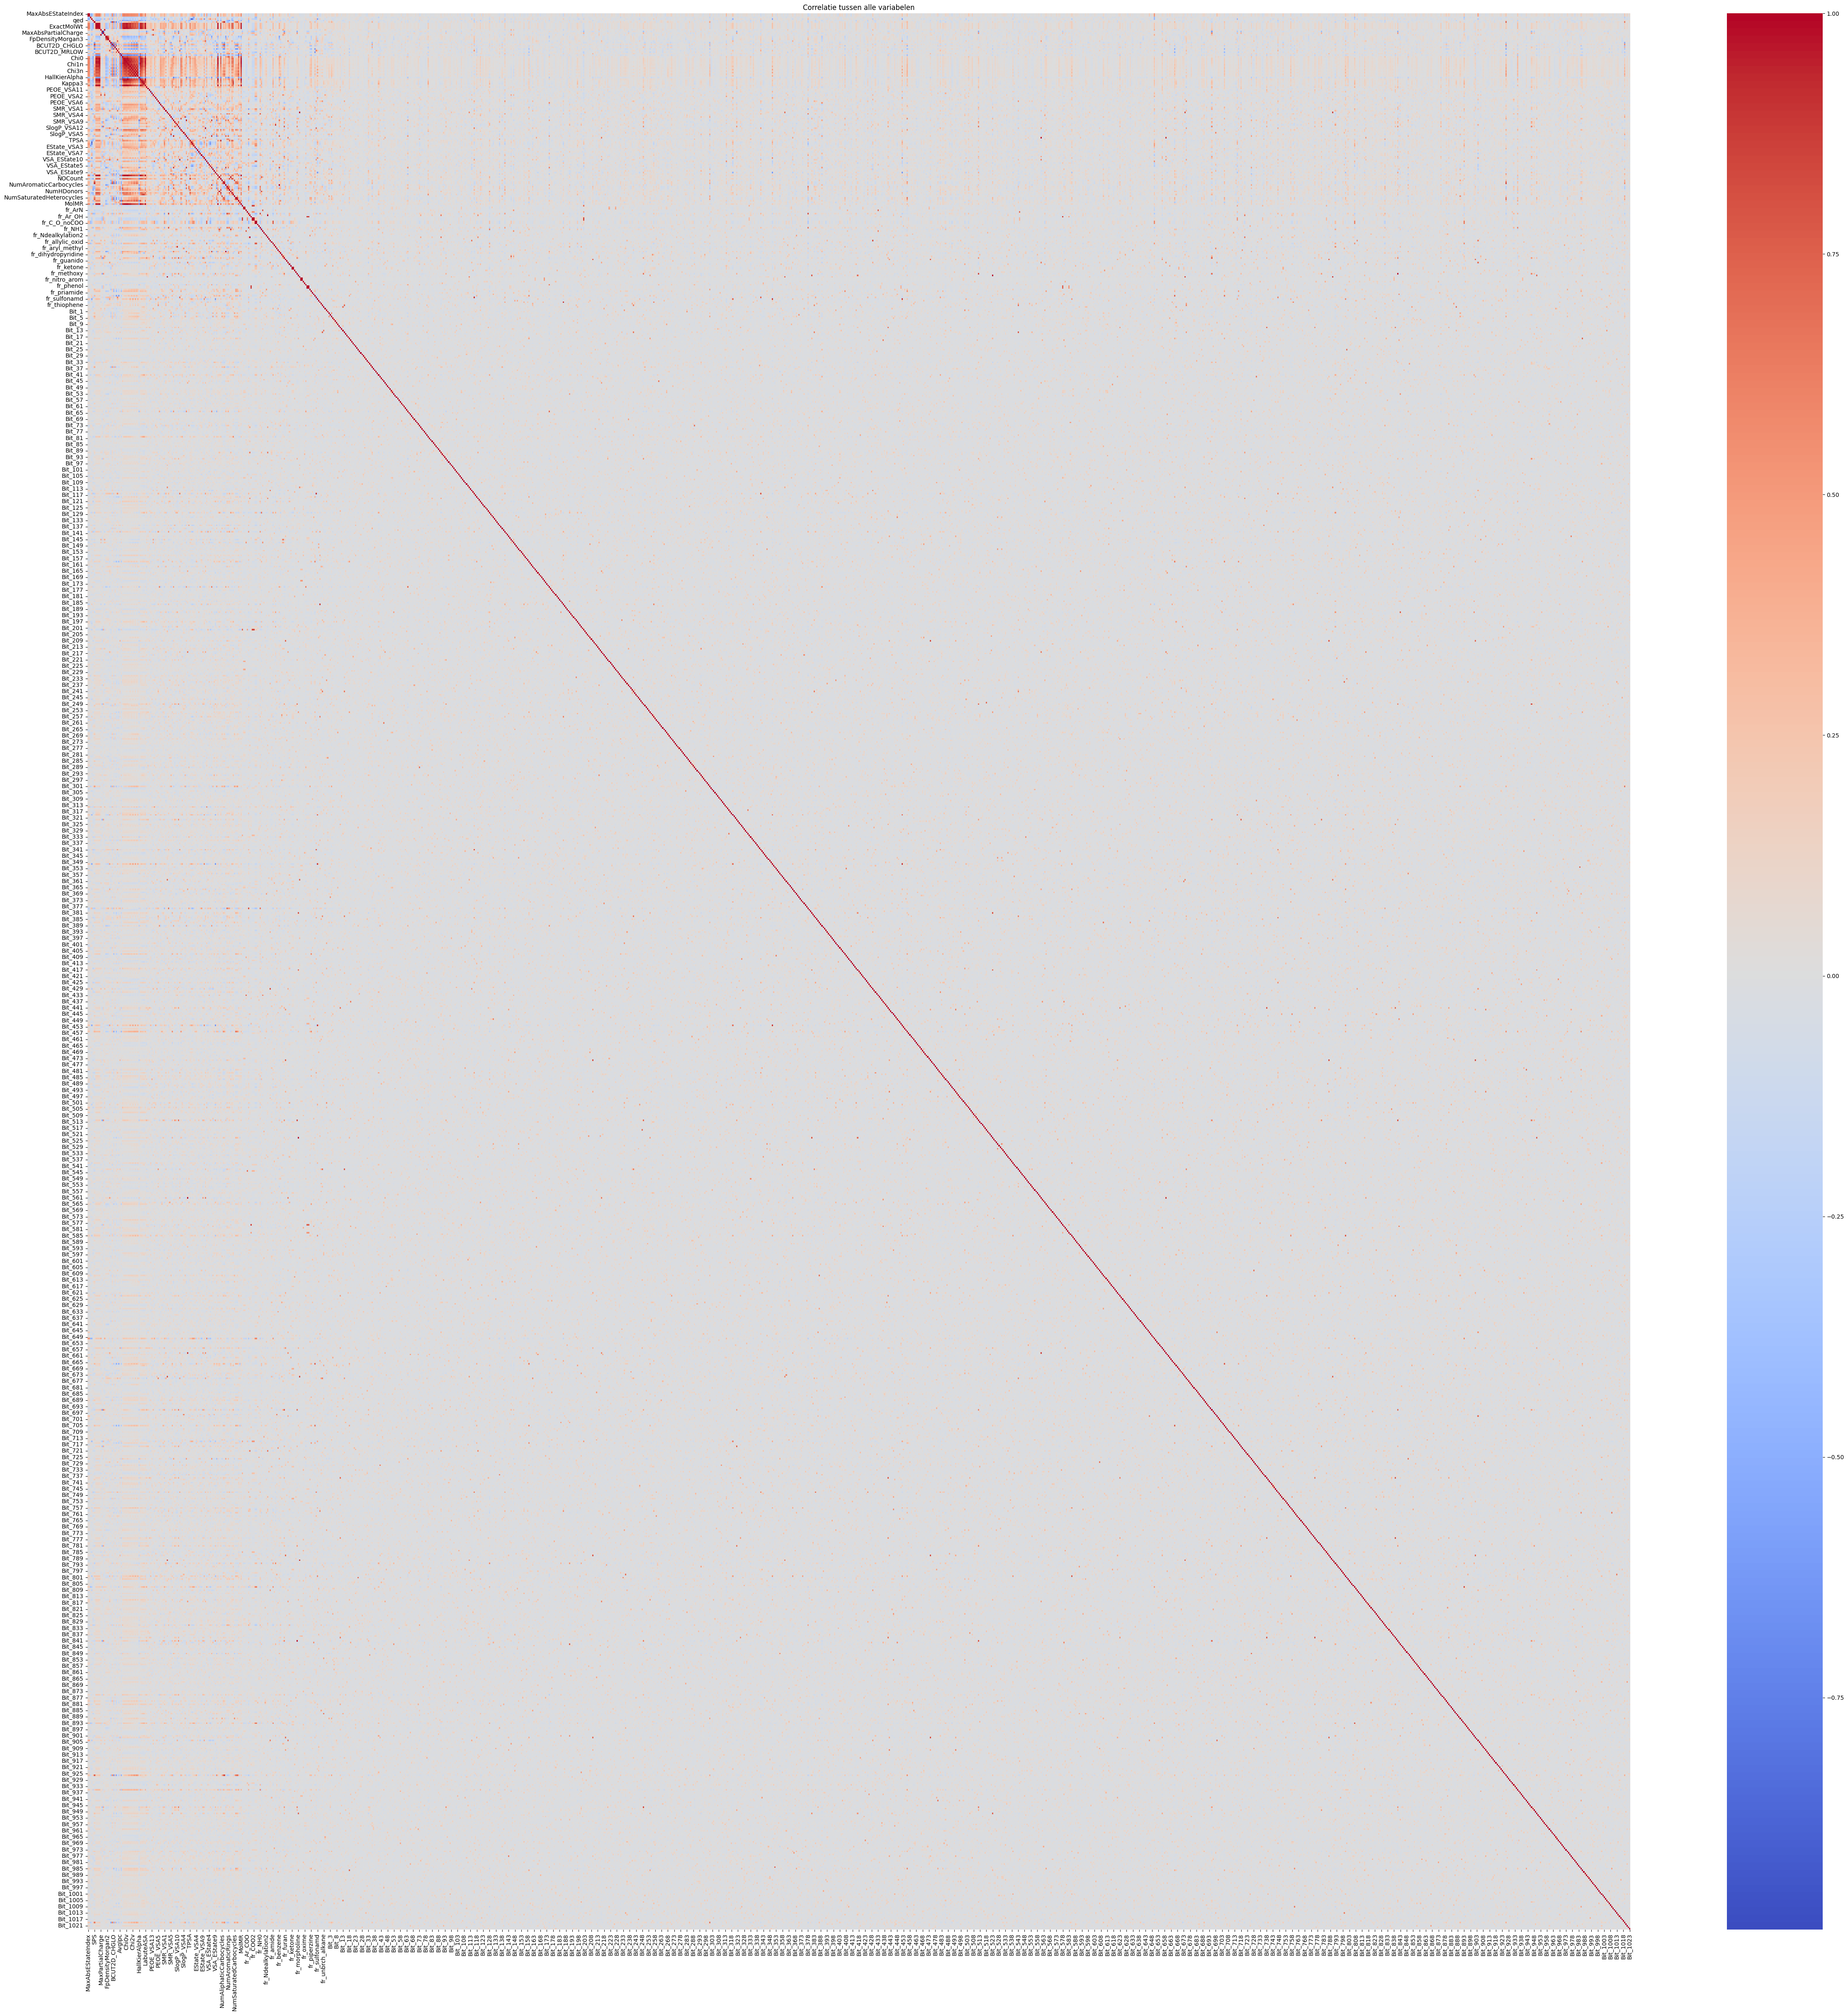

In [16]:
# voor spearman gekozen want geen normality assumed
correlation_matrix = expanded_df.iloc[:,1:].corr(method = 'spearman')

# Maak de heatmap
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlatie tussen alle variabelen')
plt.show()

# wij denken dat een zo laag mogelijke correlatie beter is, omdat sterk gerelateerde variabelen geen extra informatie geven

In [17]:
# wij denken dat we vanaf hier aan stap 3 moeten beginnen en een model voor het deep learning gedeelte moeten 
#schrijven om te selecteren welke variabelen het belangrijkste zijn